In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('RELIANCE.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-06,2413.000000,2480.000000,2412.000000,2425.600098,2409.806641,15525644
1,2021-09-07,2430.000000,2458.000000,2412.000000,2440.899902,2425.006836,8006968
2,2021-09-08,2452.000000,2454.000000,2406.649902,2431.350098,2415.519287,6600210
3,2021-09-09,2427.899902,2437.850098,2416.100098,2425.600098,2409.806641,4136538
4,2021-09-13,2433.000000,2433.000000,2368.050049,2371.550049,2356.108643,7527598


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2021-09-06,2425.600098
1,2021-09-07,2440.899902
2,2021-09-08,2431.350098
3,2021-09-09,2425.600098
4,2021-09-13,2371.550049
...,...,...
491,2023-08-29,2420.350098
492,2023-08-30,2418.050049
493,2023-08-31,2407.000000
494,2023-09-01,2412.649902


In [4]:
df['Date']

0      2021-09-06
1      2021-09-07
2      2021-09-08
3      2021-09-09
4      2021-09-13
          ...    
491    2023-08-29
492    2023-08-30
493    2023-08-31
494    2023-09-01
495    2023-09-04
Name: Date, Length: 496, dtype: object

In [5]:
import datetime

def adjust_date(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


In [6]:
df['Date'] = df['Date'].apply(adjust_date)
df['Date']

0     2021-09-06
1     2021-09-07
2     2021-09-08
3     2021-09-09
4     2021-09-13
         ...    
491   2023-08-29
492   2023-08-30
493   2023-08-31
494   2023-09-01
495   2023-09-04
Name: Date, Length: 496, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2021-09-06,2425.600098
2021-09-07,2440.899902
2021-09-08,2431.350098
2021-09-09,2425.600098
2021-09-13,2371.550049
...,...
2023-08-29,2420.350098
2023-08-30,2418.050049
2023-08-31,2407.000000


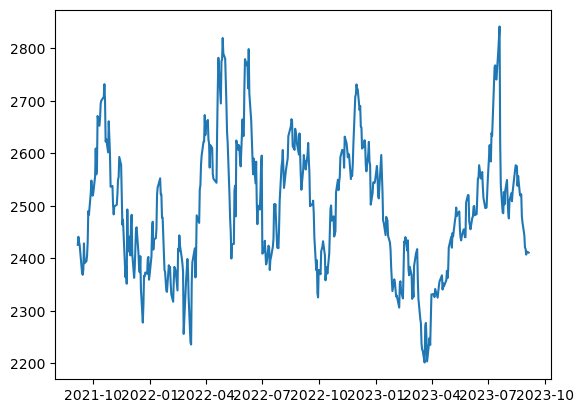

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [12]:
training_size,test_size

(322, 174)

In [13]:
train_data

array([[0.35021864],
       [0.37410219],
       [0.3591946 ],
       [0.35021864],
       [0.26584456],
       [0.26100519],
       [0.27638155],
       [0.35427711],
       [0.29550425],
       [0.30143626],
       [0.31759276],
       [0.35786757],
       [0.45059297],
       [0.43935359],
       [0.50452685],
       [0.54136746],
       [0.50983461],
       [0.49640954],
       [0.50335608],
       [0.55401163],
       [0.63682468],
       [0.55978777],
       [0.57937847],
       [0.73368706],
       [0.70465163],
       [0.72830156],
       [0.77068354],
       [0.77919111],
       [0.79043088],
       [0.82828601],
       [0.77919111],
       [0.65758654],
       [0.66523546],
       [0.62527316],
       [0.71776456],
       [0.66523546],
       [0.62027792],
       [0.52294716],
       [0.52536684],
       [0.4676085 ],
       [0.44075875],
       [0.46456455],
       [0.46940354],
       [0.500234  ],
       [0.54425515],
       [0.5515142 ],
       [0.61169222],
       [0.587

In [14]:
import numpy

def preprocessing(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = preprocessing(train_data, time_step)
X_test, ytest = preprocessing(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(221, 100)
(221,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(73, 100)
(73,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 11s 787ms/step - loss: 0.2598 - val_loss: 0.1231
Epoch 2/100
4/4 [==============================] - 1s 207ms/step - loss: 0.0750 - val_loss: 0.0588
Epoch 3/100
4/4 [==============================] - 1s 208ms/step - loss: 0.0613 - val_loss: 0.0234
Epoch 4/100
4/4 [==============================] - 1s 203ms/step - loss: 0.0315 - val_loss: 0.0317
Epoch 5/100
4/4 [==============================] - 1s 202ms/step - loss: 0.0378 - val_loss: 0.0254
Epoch 6/100
4/4 [==============================] - 1s 204ms/step - loss: 0.0289 - val_loss: 0.0214
Epoch 7/100
4/4 [==============================] - 1s 199ms/step - loss: 0.0292 - val_loss: 0.0251
Epoch 8/100
4/4 [==============================] - 1s 202ms/step - loss: 0.0292 - val_loss: 0.0205
Epoch 9/100
4/4 [==============================] - 1s 200ms/step - loss: 0.0261 - val_loss: 0.0210
Epoch 10/100
4/4 [==============================] - 1s 201ms/step - loss: 0.0266 - val_loss: 0.0205
Epoch 11

4/4 [==============================] - 1s 189ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 84/100
4/4 [==============================] - 1s 193ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 85/100
4/4 [==============================] - 1s 194ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 86/100
4/4 [==============================] - 1s 189ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 87/100
4/4 [==============================] - 1s 196ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 88/100
4/4 [==============================] - 1s 189ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 89/100
4/4 [==============================] - 1s 195ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 90/100
4/4 [==============================] - 1s 193ms/step - loss: 0.0074 - val_loss: 0.0084
Epoch 91/100
4/4 [==============================] - 1s 192ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 92/100
4/4 [==============================] - 1s 194ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 93/100


In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 40ms/step


In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2531.2706410969718

In [44]:
math.sqrt(mean_squared_error(ytest,test_predict))

2541.674153469777

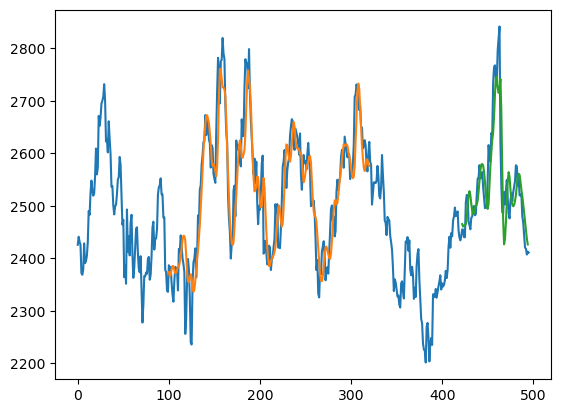

In [46]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()